In [1]:
#2. Apply the dimensionality reduction algorithms to the two datasets and describe what you see.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from preprocessor import preprocess_dodgers, preprocess_wine_combo

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.feature_selection import RFECV, RFE
from sklearn.svm import SVR

import pickle
import warnings

random_state = 1337

In [2]:
# Uncomment one set to choose which dataset to use

# X_train, X_test, y_train, y_test = preprocess_dodgers()
# dataset_name = "Dodgers"

X_train, X_test, y_train, y_test, X_train_color, X_test_color = preprocess_wine_combo()
dataset_name = "Wine"
y_train = X_train_color
dataset_name = "Wine"

range_n_components = range(1, X_train.shape[1])  # can't have more components than features in data

(array([3892.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1305.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

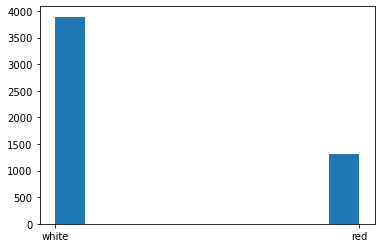

In [3]:
plt.hist(y_train)

In [4]:
if dataset_name == "Dodgers":
    y_train_nums = y_train.replace({"ball":0, "called_strike":1})
else:
    y_train_nums = y_train.replace({"red":0, "white":1})

estimator = RandomForestClassifier(random_state=random_state, n_jobs=-1)
selector = RFECV(estimator, cv=5, n_jobs=-1)
selector = selector.fit(X_train, y_train_nums)
support = selector.get_support(True)
X_train.columns[support]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [5]:
print(f"reduced {X_train.shape[1]} features down to {len(support)}")

reduced 11 features down to 11


In [6]:
selector.estimator_.feature_importances_

array([0.0450561 , 0.12019534, 0.0133355 , 0.04191798, 0.29897353,
       0.06410901, 0.29862403, 0.0470997 , 0.01849937, 0.04347418,
       0.00871526])

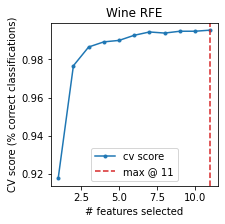

In [7]:
min_features_to_select = 1  # Minimum number of features to consider

# Plot number of features VS. cross-validation scores
fig = plt.figure(figsize=(3,3))
plt.title(f"{dataset_name} RFE")
plt.xlabel("# features selected")
plt.ylabel("CV score (% correct classifications)")
plt.plot(range(min_features_to_select,
               len(selector.grid_scores_) + min_features_to_select),
         selector.grid_scores_, marker='.', label = "cv score")
plt.axvline(len(support), label=f"max @ {len(support)}", c="C3", linestyle='--')
plt.legend()
plt.show()

In [19]:
X_train_transformed = pd.DataFrame( selector.transform(X_train), columns=X_train.columns[support])
X_train_transformed.to_csv(f"output/{dataset_name}/rfe-train-transformed.csv")

In [20]:
X_test_transformed = pd.DataFrame( selector.transform(X_test), columns=X_train.columns[support])
X_test_transformed.to_csv(f"output/{dataset_name}/rfe-test-transformed.csv")

In [23]:
manual_feature_set = True
if manual_feature_set == True:
    manual_features = 3
    manual_estimator = RandomForestClassifier(random_state=random_state, n_jobs=-1)
    manual_selector = RFE(manual_estimator, n_features_to_select=manual_features, step=1)
    manual_selector = manual_selector.fit(X_train, y_train)
    manual_support = manual_selector.get_support(True)

    
    X_train_transformed = pd.DataFrame( manual_selector.transform(X_train), columns=X_train.columns[manual_support])
    X_train_transformed.to_csv(f"output/{dataset_name}/rfe-train-transformed.csv")
    X_test_transformed = pd.DataFrame( manual_selector.transform(X_test), columns=X_train.columns[manual_support])
    X_test_transformed.to_csv(f"output/{dataset_name}/rfe-test-transformed.csv")

In [24]:
manual_selector.support_


array([False,  True, False, False,  True, False,  True, False, False,
       False, False])

In [9]:
selector.grid_scores_

array([0.91764604, 0.9767167 , 0.98652958, 0.98922522, 0.98999482,
       0.99268842, 0.99441975, 0.99384264, 0.99480492, 0.99480473,
       0.99538221])